# Prediction using Supervised ML

## Name : - Uma Gulab Jain

## Problem Statement :-
                   

### Predict the percentage of an student based on the no. of study hours.

### Data Source : -  "http://bit.ly/w-data"

###### Import the required  libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
sns.set()

print('The libraries imported successfully!')

The libraries imported successfully!


###### Import data

In [2]:
data=pd.read_csv('http://bit.ly/w-data')
print('The data has been imported successfully!')
data.head()

The data has been imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###### Analyse the Data

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


###### Check for missing values

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

###### Visualization

Text(0, 0.5, 'Scores')

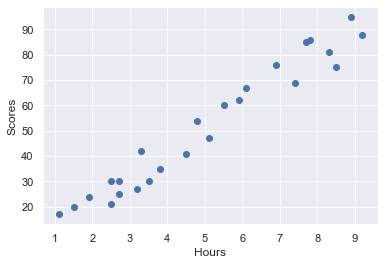

In [6]:
#scatter plot
y=data['Scores']
x1=data['Hours']

plt.scatter(x1,y)
plt.xlabel('Hours')
plt.ylabel('Scores')

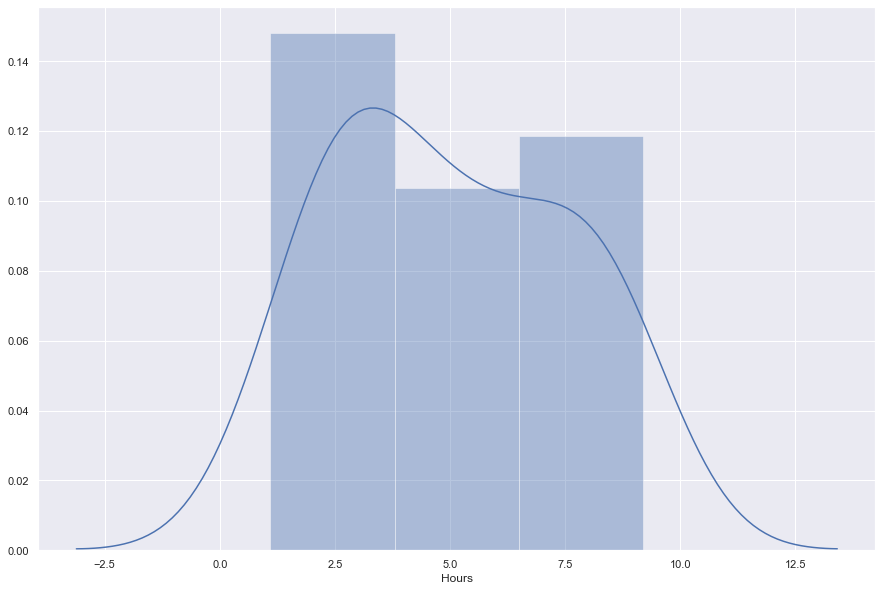

In [7]:
#Avergae study hours
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['Hours'])

###### Split data

In [8]:

#X is our feature/attribute/input and y is our label(What we are predicting)
X = data['Hours']
y = data['Scores']

In [ ]:
print(X.shape)

In [9]:
x_matrix=X.values.reshape(-1,1)
x_matrix.shape

(25, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_matrix, y, test_size=0.2, random_state=0)

###### Model Creation

In [11]:
reg=LinearRegression()
reg.fit(x_matrix,y)
print('The model trained successfully!')

The model trained successfully!


###### Plot Regression

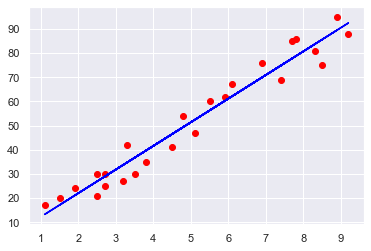

In [12]:
line = reg.coef_*x_matrix+reg.intercept_

# Plot test data
plt.scatter(X, y,color='red')
plt.plot(X, line,color='blue')

###### Predictions

In [15]:
predicted= reg.predict(X_test)
predicted   

array([17.14737849, 33.76624426, 74.8246185 , 26.92318188, 60.16091341])

In [16]:
reg.score(X_test,y_test)

0.9491748734859171

#### Actual vs Predicted

In [17]:
result= pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
result

,Actual,Predicted
5,20,17.147378
2,27,33.766244
19,69,74.824618
16,30,26.923182
11,62,60.160913


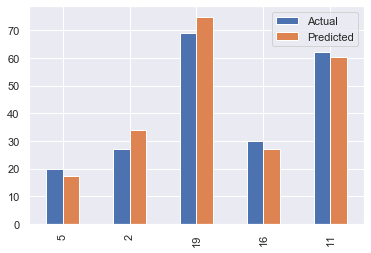

In [18]:
result.plot(kind='bar') 

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [19]:
result_final=reg.predict([[9.25]])
print("Predicted Percentage For Student who studies for 9.25 hrs /day :- {} %".format(result_final[0]))

Predicted Percentage For Student who studies for 9.25 hrs /day :- 92.90985477015731 %


# Model Evaluation

In [20]:
print("Slope of Regression Line ",reg.coef_)
print("Y-intercept Of Regression Line",reg.intercept_)

Slope of Regression Line  [9.77580339]
Y-intercept Of Regression Line 2.483673405373196


In [21]:
print('Mean Absolute Error Is : ' , metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error Is : ' , metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error Is : ' , np.sqrt(metrics.mean_absolute_error(y_test,predicted)))

Mean Absolute Error Is :  4.071877793635608
Mean Squared Error Is :  20.1389481299402
Root Mean Squared Error Is :  2.0178894403895393
